# Load Profile and Extract Data: CU

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re

%config InlineBackend.figure_formats = ['svg']

#plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [3, 3]
#plt.rcParams['font.size'] = 6
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['lines.markersize'] = 1.

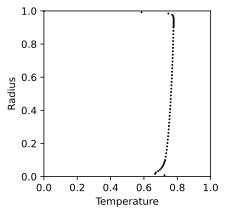

In [2]:
h = 'H50'; ra = '1e8'; modelType = 'ISO'; res = '64';
modelName1= modelType+'Ra'+ra;
model_name=modelName1+'-'+res # just your model name
big_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_MH\\'

model_path_prefix2=big_path + ra  # adjust for where the model data is located
model_path_prefix=big_path + ra + '\\' + h +'\\Case' \
        + model_name+'\\output-'+model_name
full_path = big_path + ra + '\\' + h 


rad = pd.read_csv(full_path+'\\Radius_Test1.txt',header=None).to_numpy().T.flatten()
temp = pd.read_csv(full_path+'\\Temperature.txt',header=None).to_numpy().T.flatten()

plt.figure()
plt.plot(temp,rad,'o',color='black');
plt.ylabel('Radius')
plt.xlabel('Temperature')
plt.ylim((0,1));
plt.xlim((0,1));

## Fit the Interior

ti = 0.7768866361608329


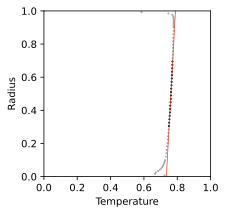

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idMin = find_nearest(rad,0.3)
idMax = find_nearest(rad,0.7) + 1

T1 = temp[idMin:idMax]
R1 = rad[idMin:idMax]

def lineFunction(x,a,b):
    return x*a + b

m1, _ = curve_fit(lineFunction,R1,T1)

plt.figure()
plt.plot(temp,rad,'o',color='#a6a6a6');
plt.plot(T1,R1,'o',color='black');
xx = np.arange(0,1.5,0.1)
plt.plot(m1[0]*xx+m1[1],xx, color='#d64127')
plt.ylabel('Radius')
plt.xlabel('Temperature')
plt.ylim((0,1));
plt.xlim((0,1));

mid_point = (1+0.55)/2
ti = mid_point*m1[0]+m1[1]
print('ti =',ti)

## Fit Upper Boundary Layer

du = 0.01035797908912861
tu = 0.7885957224266295


C:\Users\super\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


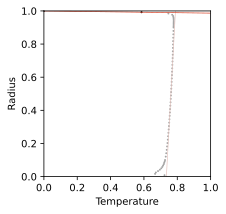

In [4]:
R2 = rad[-2::]
T2 = temp[-2::]

m2,_ = curve_fit(lineFunction,R2,T2)

plt.figure()
plt.plot(temp,rad,'o',color='#a6a6a6');
plt.plot(T2,R2,'o',color='black');
xx = np.arange(0,1.5,0.1)
plt.plot(m1[0]*xx+m1[1],xx, color='#e3c4bf')
plt.plot(m2[0]*xx+m2[1],xx, color='#d64127')
plt.ylabel('Radius')
plt.xlabel('Temperature')
plt.ylim((0,1));
plt.xlim((0,1));

dU = 1 - (m2[1]-m1[1])/(m1[0]-m2[0])
tU = (1-dU)*m1[0]+m1[1]

print('du =', dU)
print('tu =', tU)

## Fit Lower Boundary Layer

C:\Users\super\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


dl = 0.007984207732423282
tl = 0.7350446238615789


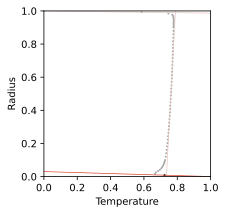

In [5]:
R3 = rad[0:2]
T3 = temp[0:2]

m3,_ = curve_fit(lineFunction,R3,T3)

plt.figure()
plt.plot(temp,rad,'o',color='#a6a6a6');
plt.plot(T3,R3,'o',color='black');
xx = np.arange(0,1.5,0.1)
plt.plot(m1[0]*xx+m1[1],xx, color='#e3c4bf')
plt.plot(m2[0]*xx+m2[1],xx, color='#e3c4bf')
plt.plot(m3[0]*xx+m3[1],xx, color='#d64127')
plt.ylabel('Radius')
plt.xlabel('Temperature')
plt.ylim((0,1));
plt.xlim((0,1));

dL = (m3[1]-m1[1])/(m1[0]-m3[0])
tL = (dL)*m1[0]+m1[1]

print('dl =', dL)
print('tl =', tL)

## Construct Geotherm

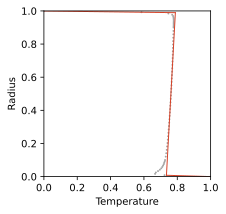

In [6]:
a = 1 - dU
x1 = np.arange(dL,a,0.000001) # interior
x2 = np.arange(a,1.3,0.000001) # top
x3 = np.arange(0,dL,0.000001) # bottom

plt.rcParams['lines.linewidth'] = 1
plt.figure()
plt.plot(temp,rad,'o',color='#a6a6a6');
xx = np.arange(0,1.5,0.1)
plt.plot(m1[0]*x1+m1[1],x1, color='#d64127')
plt.plot(m2[0]*x2+m2[1],x2, color='#d64127')
plt.plot(m3[0]*x3+m3[1],x3, color='#d64127')
plt.ylabel('Radius')
plt.xlabel('Temperature')
plt.ylim((0,1));
plt.xlim((0,1));

In [7]:
file = open(model_path_prefix2+"\\Ra.txt", "a")
str2 = repr(float(ra))
file.write(str2+'\n')
file.close()

file = open(model_path_prefix2+"\\interiorTemp.txt", "a")
str = repr(ti)
file.write(str+'\n')
file.close()

file = open(model_path_prefix2+"\\UpperTemp.txt", "a")
str = repr(tU)
file.write(str+'\n')
file.close()

file = open(model_path_prefix2+"\\LowerTemp.txt", "a")
str = repr(tL)
file.write(str+'\n')
file.close()

file = open(model_path_prefix2+"\\UpperBL.txt", "a")
str = repr(dU)
file.write(str+'\n')
file.close()

file = open(model_path_prefix2+"\\LowerBL.txt", "a")
str = repr(dL)
file.write(str+'\n')
file.close()

In [8]:
print('ti =',ti)
print('du =', dU)
print('tu =', tU)
print('dl =', dL)
print('tl =', tL)

ti = 0.7768866361608329
du = 0.01035797908912861
tu = 0.7885957224266295
dl = 0.007984207732423282
tl = 0.7350446238615789
